# Simple Linear Regression Minimal Example

## import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
observations=1000
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
inputs=np.column_stack((xs,zs))
print(inputs)

[[ 1.18023548 -8.9184681 ]
 [ 0.42624449 -6.77967596]
 [ 9.78627716 -8.1848439 ]
 ...
 [ 1.29364918  9.63087725]
 [ 1.65296982 -9.55487246]
 [ 8.92314186 -6.02704518]]


## creating the targets we will aim  at

In [3]:
# creating a noise that is seen in real data

noise=np.random.uniform(-1,1,(observations,1))

In [4]:
targets=2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


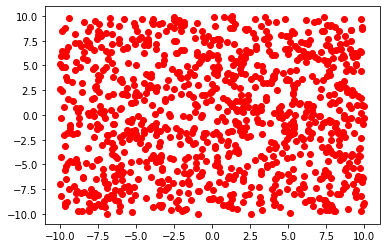

In [5]:
plt.scatter(xs,zs,color='red')


## plot the training data

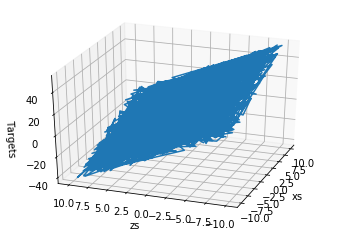

In [6]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=200)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

## Initialising varibale(weights and biases)

In [7]:
init_range=0.1
weights=np.random.uniform(-init_range,init_range,size=(2,1))
biases=np.random.uniform(-init_range,init_range,size=1)
print(weights)
print(biases)

[[-0.0874737 ]
 [ 0.07384181]]
[0.06883522]


## set a learning rate(eta)

In [8]:
learning_rate=0.02



## train the model

In [9]:
for i in range(100):
    outputs=np.dot(inputs,weights)+biases
    deltas=outputs-targets
    #l2 norm loss function for regression and furthur optimising
    loss=np.sum(deltas**2)/2/10
    print(loss)
    deltas_scaled=deltas/observations
    #using the gradient-descent model algorithm for optimising
    weights=weights-learning_rate*np.dot(inputs.T,deltas_scaled)
    biases=biases-learning_rate*np.sum(deltas_scaled)

23833.17356055422
4018.134717487758
1496.5440453905462
1140.3705125938636
1058.3423452142365
1012.4494384881691
972.5443491844686
934.7466865567797
898.5096573942035
863.7125339423168
830.2909016281216
798.1894687118078
767.3559678710266
737.7403036756161
709.2943730726605
681.97197470138
655.7287322468515
630.522022159434
606.3109044004289
583.0560559450288
560.7197069145222
539.265579231451
518.6588276977562
498.8659834001761
479.85489935096655
461.594698275657
444.05572246303836
427.20948559593455
411.0286264845152
395.486864627013
380.55895752566244
366.2206596885361
352.44868325069126
339.22066015066537
326.5151058008936
314.31138419303727
302.5896743815538
291.3309382910665
280.5168897952531
270.1299650170252
260.15329380176945
250.57067231730971
241.36653673609376
232.5259379568567
224.03451732470603
215.87848331019396
208.04458910949725
200.5201111293283
193.29282832162636
186.35100233447253
179.68335844698436
173.2790672572268
167.1277270933989
161.21934711972807
155.544331109

## print weights and biases

In [10]:
print(weights,biases)

[[ 2.00747867]
 [-2.99381718]] [4.37135635]


## plot last output vs targets

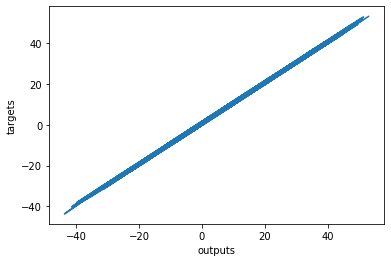

In [11]:

plt.plot(outputs,targets)


plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()